# Iris

This is very similar to the quick start example.

In [8]:
from sklearn.datasets import load_iris
import numpy as np
from spin import NeighborhoodSPIN
from spin.distances import l2_distance_matrix

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [4]:
data = load_iris()
X = data.data
y = data.target

In [12]:
shuffle_index = np.arange(0, len(X))
np.random.shuffle(shuffle_index)

In [19]:
X = X[shuffle_index]
y = y[shuffle_index]

In [20]:
distances = l2_distance_matrix(X.T, X.T)

### Original distances matrix

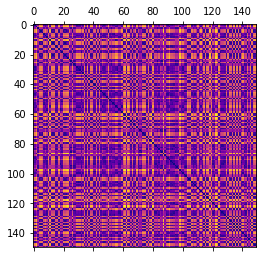

In [21]:
plt.matshow(distances, cmap="plasma")

## SPIN

In [22]:
nspin = NeighborhoodSPIN()

In [23]:
nspin.run(distances)

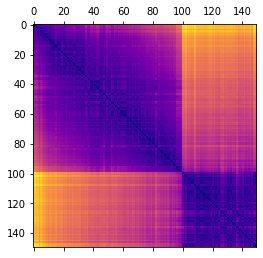

In [24]:
plt.matshow(nspin.ordered_distances_, cmap="plasma")

### Target visualization

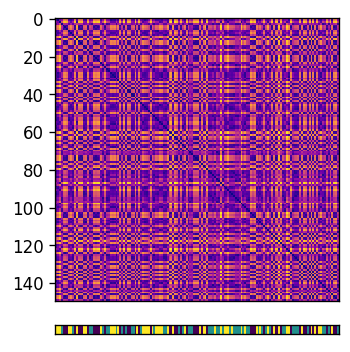

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as it

xy = list( it.product( range(10), range(10) ) )
df = pd.DataFrame( xy, columns=['x','y'] )
df['score'] = np.random.random( 100 )

kw = {'height_ratios':[5,5]}
fig, (ax,ax2) = plt.subplots(2,1, sharex=True, figsize=(5, 5), dpi=120)
fig.subplots_adjust(hspace=-0.4)
ax.matshow(distances, cmap="plasma")
ax2.matshow(y.reshape(1, len(y)), aspect=5)
ax2.set_xticks([])
ax2.set_yticks([])

pos = ax.get_position()
pos2 = ax2.get_position()
ax2.set_position([pos.x0,pos2.y0,pos.width,pos2.height])

#plt.show()

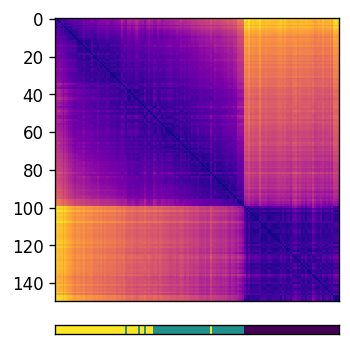

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as it

xy = list( it.product( range(10), range(10) ) )
df = pd.DataFrame( xy, columns=['x','y'] )
df['score'] = np.random.random( 100 )

kw = {'height_ratios':[5,5]}
fig, (ax,ax2) = plt.subplots(2,1, sharex=True, figsize=(5, 5), dpi=120)
fig.subplots_adjust(hspace=-0.4)
ax.matshow(nspin.ordered_distances_, cmap="plasma")
ax2.matshow(nspin.permutation_.dot(y).reshape(1, len(y)), aspect=5)
ax2.set_xticks([])
ax2.set_yticks([])

pos = ax.get_position()
pos2 = ax2.get_position()
ax2.set_position([pos.x0,pos2.y0,pos.width,pos2.height])

#plt.show()